<a href="https://colab.research.google.com/github/priscilla1812/Employee-Attrition-Analysis-Performance-Insights/blob/main/Employee_Attrition_Analysis_%26_Performance_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IBM HR Analytics Employee Attrition Analysis & Performance Insights

**What is Employee Attrition?**

Employee attrition happens when an employee leaves an organization for any reason and is not replaced for a long time, or not ever. It often results in a decrease in the size of an organization's or department's workforce because positions aren't refilled when employees leave.

**Problem Statement**:

Employee attrition poses a significant challenge for organizations, leading to increased recruitment costs, loss of experienced staff, and disruption in team productivity. Identifying the key factors that influence why employees leave is essential for Human Resource (HR) departments to develop effective retention strategies.

This project aims to analyze the IBM HR Analytics Employee Attrition & Performance dataset to uncover insights into the underlying causes of employee attrition. By leveraging data analytics techniques, we will explore trends related to demographics, job roles, compensation, satisfaction levels, and work environment. The ultimate goal is to support data-driven HR decisions that can reduce attrition and improve employee retention.

**Key Questions to Answer:**

1. What is the overall attrition rate in the company?

2. Which job roles and departments have the highest attrition?

3. Is there a correlation between overtime and attrition?

4. Does job satisfaction or work-life balance influence attrition?

5. How do income, education, and experience affect attrition?

*Dataset Description*:

The IBM HR Analytics Employee Attrition & Performance dataset contains information about employees from a fictional company. The dataset is widely used in HR analytics projects, especially for predictive modeling and exploratory data analysis.

*Columns Description*:

**Age**: Age of the employee

**Attrition**: Target variable indicating if an employee left (Yes) or stayed (No)

**BusinessTravel**: Frequency of business travel (e.g., Travel_Rarely, Travel_Frequently)

**DailyRate**: Daily wage rate

**Department**: Department of the employee (Sales, R&D, HR)

**DistanceFromHome**: Distance between home and work (in km)

**Education**: Education level (1 = Below College, 5 = Doctor)

**EducationField**: Field of education (e.g., Life Sciences, Medical, Marketing)

**EmployeeCount**: Always 1

**EmployeeNumber**: Unique ID for each employee

**EnvironmentSatisfaction**: Satisfaction with workplace environment (1–4)

**Gender**: Gender of the employee

**HourlyRate**: Hourly wage

**JobInvolvement**: Level of involvement in the job (1–4)

**JobLevel**: Seniority level within the company

**JobRole**: Role (e.g., Sales Executive, Manager, Research Scientist)

**JobSatisfaction**: Job satisfaction level (1–4)

**MaritalStatus**: Marital status (Single, Married, Divorced)

**MonthlyIncome**: Gross monthly income

**MonthlyRate**: Monthly rate

**NumCompaniesWorked**: Number of previous employers

**Over18**: Adult or not (Y/N)

**OverTime**: Whether the employee works overtime (Yes/No)

**PercentSalaryHike**: Percentage salary increase

**PerformanceRating**: Performance score (mostly 3 or 4)

**RelationshipSatisfaction**: Satisfaction with coworkers (1–4)

**StandardHours**:	Always 80

**StockOptionLevel**: Stock options granted

**TotalWorkingYears**: Total years of professional experience

**TrainingTimesLastYear**:	Number of trainings attended last year

**WorkLifeBalance**:	Work-life balance rating (1–4)

**YearsAtCompany**:	No. of Years spent in the company

**YearsInCurrentRole**:  No. of Years in current job role

**YearsSinceLastPromotion**: No. of Years since last promotion

**YearsWithCurrManager**: No. of Years working with the current manager

In [1]:
import numpy as np
import pandas as pd

## Load the Dataset

In [2]:
# Import the dataset
df = pd.read_csv("IBM_HR_Analytics_Dataset.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## Data Preprocessing

In [3]:
# Number of rows and columns in the dataset
print("Rows and Columns:", df.shape)

Rows and Columns: (1470, 35)


In [4]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# Descriptive statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
# Check for missing values
print("Missing Values:", df.isnull().values.any())

Missing Values: False


In [7]:
# Check for duplicates
df.duplicated().sum()

np.int64(0)

No missing values and duplicate values

In [8]:
# Print the count of attrition in the dataset
print("Count", df['Attrition'].value_counts())
print()
# Print the percent of attrition in the dataset
print("Percent", df['Attrition'].value_counts(normalize=True) * 100)

Count Attrition
No     1233
Yes     237
Name: count, dtype: int64

Percent Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


'EmployeeCount', 'Over18', 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values. This features are not useful for analysis.

**MonthlyIncome** = Actual pay employee receives.

**MonthlyRate** = HR system rate assigned to role (not equal to actual income).

MonthlyRate is dropped because it’s less interpretable in real-world analysis.

In [9]:
# Drop Unnecessary Columns
df.drop(['EmployeeNumber','EmployeeCount', 'Over18', 'StandardHours', 'MonthlyRate'], axis=1, inplace=True)

In [10]:
# check range of scores
satisfaction_cols = ['JobSatisfaction', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'RelationshipSatisfaction','PerformanceRating']
for col in satisfaction_cols:
    print(f"{col} unique values:", df[col].unique())
    print()

JobSatisfaction unique values: [4 2 3 1]

EnvironmentSatisfaction unique values: [2 3 4 1]

WorkLifeBalance unique values: [1 3 2 4]

RelationshipSatisfaction unique values: [1 4 2 3]

PerformanceRating unique values: [3 4]



In [11]:
# Check for duplicated categories
df['Department'].value_counts()        # can be used to spot misspelled or duplicate labels.

,count
Department,
Research & Development,961
Sales,446
Human Resources,63


In [12]:
df['JobRole'].value_counts()

,count
JobRole,
Sales Executive,326
Research Scientist,292
Laboratory Technician,259
Manufacturing Director,145
Healthcare Representative,131
Manager,102
Sales Representative,83
Research Director,80
Human Resources,52


In [13]:
df['BusinessTravel'].value_counts()

,count
BusinessTravel,
Travel_Rarely,1043
Travel_Frequently,277
Non-Travel,150


In [14]:
# Numerical Columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols].describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [15]:
# Categorical Columns
cat_cols = df.select_dtypes(include='object').columns
# Convert string-based categorical columns
for col in cat_cols:
    df[col] = df[col].astype('category')

In [16]:
ordinal_cols = ['JobSatisfaction', 'EnvironmentSatisfaction', 'RelationshipSatisfaction',
                'WorkLifeBalance', 'Education', 'JobLevel', 'PerformanceRating', 'StockOptionLevel']

# Convert numeric-ordinal columns to category
for col in ordinal_cols:
    df[col] = df[col].astype('category')

In [17]:
# Feature Engineering
# Create New Grouped Columns for Data Visualization

# Age Group
# Group continuous Age values into age ranges
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[df['Age'].min(), 25, 35, 45, 55, df['Age'].max()],
                        labels=['18–25', '26–35', '36–45', '46–55', '56+'])

In [18]:
# Years at Company Group
# Group employees based on tenure
df['YearsAtCompanyGroup'] = pd.cut(df['YearsAtCompany'], bins=[-1, 2, 5, 10, 40],
                                   labels=['0–2', '3–5', '6–10', '10+'])

In [19]:
# Income Group
# Categorize income into Low/Medium/High
df['IncomeGroup'] = pd.cut(df['MonthlyIncome'],
                           bins=[df['MonthlyIncome'].min(), 3000, 7000, df['MonthlyIncome'].max()],
                           labels=['Low', 'Medium', 'High'])

In [20]:
df['IncomeGroup'].dtypes

CategoricalDtype(categories=['Low', 'Medium', 'High'], ordered=True, categories_dtype=object)

In [21]:
# Convert Feature Groups to category datatype
group_cols = ['AgeGroup', 'YearsAtCompanyGroup', 'IncomeGroup']
for col in group_cols:
    df[col] = df[col].astype('category')

In [22]:
# Map numerical values to categories
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

df['Education'] = df['Education'].map(education_map)

In [23]:
# Convert to categorical dtype for efficiency
df['Education'] = df['Education'].astype('category')

## Data Visualization

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [25]:
# Target Variable Analysis

# Count of Attrition
attrition_count = df['Attrition'].value_counts().reset_index()
attrition_count.columns = ['Attrition', 'Count']

# Plot pie chart
fig = px.pie(attrition_count,
             names='Attrition',
             values='Count',
             color='Attrition',
             color_discrete_map={'Yes':'green','No':'darkblue'},
             title='Employee Attrition Overview')  # Add hole=0.3 for donut chart

fig.update_traces(textposition='inside', textinfo='percent+label')

fig.update_layout( width=700,height=500)

fig.show()


In [26]:
attrition_count = df['Attrition'].value_counts()
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print(f"Insight: Attrition rate is {attrition_rate['Yes']:.2f}% "
      f"({attrition_count['Yes']:.0f} employees left).")

Insight: Attrition rate is 16.12% (237 employees left).


In [27]:
# Attrition by Department
fig2 = px.histogram(df, x='Department', color='Attrition', barmode='group', color_discrete_map={'Yes':'green','No':'darkblue'})
fig2.show()

**Insight:** Research & Development (R&D) dept. and Sales dept. have higher attrition comapred to HR dept.

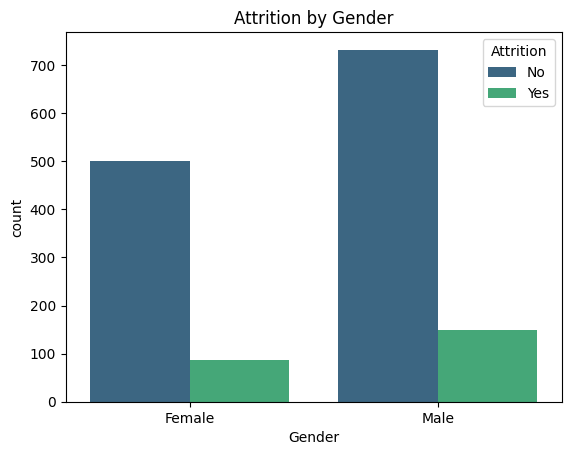

In [28]:
# Gender
sns.countplot(data=df, x='Gender', hue='Attrition', palette='viridis')
plt.title('Attrition by Gender')
plt.show()

**Insight:** More no. of male employees who quit or left the company compared to female employees.

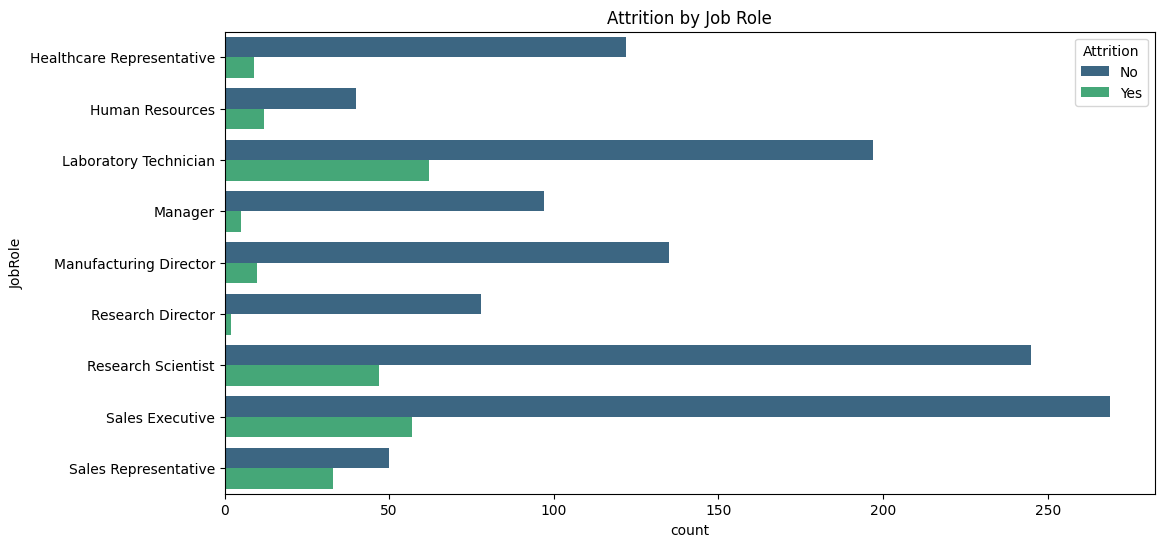

In [29]:
# Job Role
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='JobRole', hue='Attrition', palette='viridis')
plt.title('Attrition by Job Role')
plt.show()

**Insight:** Job roles like 'Laboratory Technician', 'Sales Executive', 'Research Scientist' and 'Sales Representative' have higher attrition.

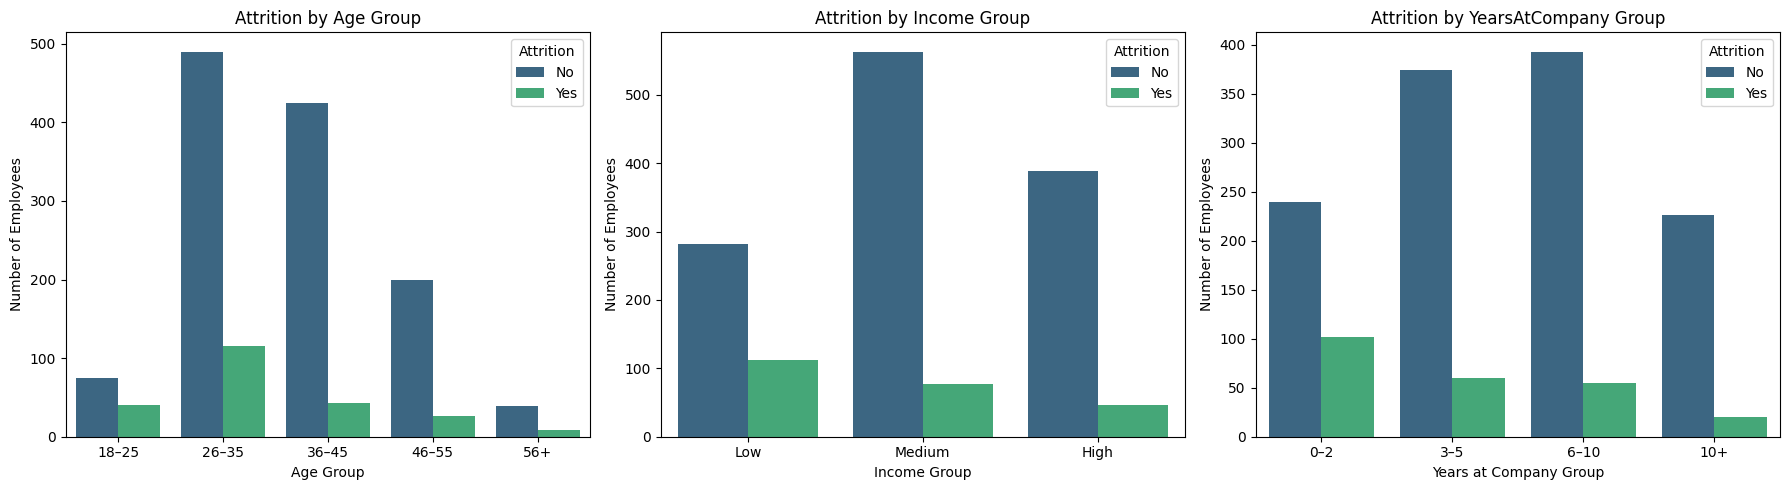

In [30]:
# Attrition by Age Group, IncomeGroup, YearsAtCompanyGroup subplots

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Attrition by Age Group
sns.countplot(data=df, x='AgeGroup', hue='Attrition', palette='viridis', ax=axes[0])
axes[0].set_title("Attrition by Age Group")
axes[0].set_ylabel("Number of Employees")
axes[0].set_xlabel("Age Group")

# Attrition by Income Group
sns.countplot(data=df, x='IncomeGroup', hue='Attrition', palette='viridis', ax=axes[1])
axes[1].set_title("Attrition by Income Group")
axes[1].set_ylabel("Number of Employees")
axes[1].set_xlabel("Income Group")

# Attrition by YearsAtCompany Group
sns.countplot(data=df, x='YearsAtCompanyGroup', hue='Attrition', palette='viridis', ax=axes[2])
axes[2].set_title("Attrition by YearsAtCompany Group")
axes[2].set_ylabel("Number of Employees")
axes[2].set_xlabel("Years at Company Group")

# Adjust layout
plt.tight_layout()
plt.show()


**Insight:** Employees of age 26-35 have higher attrition rates. Employees who receive less salary (low range income) tend to quit or leave the company. Employees with 0-2 years experience at company have higher attrition risk. Employees with lower tenure have higher attrition.

In [31]:
# Performance Rating Distribution
fig3 = px.histogram(df, x='PerformanceRating', color='Attrition', barmode='group', color_discrete_map={'Yes':'green','No':'darkblue'})
fig3.show()

**Insight:** Most performance ratings are high (3 or 4), suggesting limited rating variance. Lower ratings correlate with higher attrition

In [32]:
# Education Distribution
fig4 = px.histogram(df, x='Education', color='Attrition', barmode='group', color_discrete_map={'Yes':'green','No':'darkblue'})
fig4.show()

**Insight:** Employees who has only a bachelors degree are highly prone to attrition, compared to others.

In [33]:
# Overtime Impact
fig = px.histogram(df,
                   x='OverTime',
                   color='Attrition',
                   barmode='group',     # side-by-side bars
                   text_auto=True,      # show counts
                   color_discrete_map={'Yes':'green','No':'darkblue'})

fig.update_layout(
    title="Attrition by Overtime",
    xaxis_title="Overtime",
    yaxis_title="Number of Employees"
)

fig.show()

**Insight:** Employees doing overtime show higher attrition rates — possible burnout risk.

In [34]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create subplots (2 rows, 3 columns)
fig = make_subplots(rows=2, cols=3,
                    subplot_titles=("Job Satisfaction",
                                    "Work-Life Balance",
                                    "Environment Satisfaction",
                                    "Job Involvement",
                                    "Relationship Satisfaction"))

# Job Satisfaction
job = px.histogram(df, x='JobSatisfaction', color='Attrition', barmode='group', color_discrete_map={'Yes':'green','No':'darkblue'})
for trace in job['data']:
    fig.add_trace(trace, row=1, col=1)

# Work-Life Balance
wlb = px.histogram(df, x='WorkLifeBalance', color='Attrition', barmode='group', color_discrete_map={'Yes':'green','No':'darkblue'})
for trace in wlb['data']:
    fig.add_trace(trace, row=1, col=2)

# Environment Satisfaction
es = px.histogram(df, x='EnvironmentSatisfaction', color='Attrition', barmode='group', color_discrete_map={'Yes':'green','No':'darkblue'})
for trace in es['data']:
    fig.add_trace(trace, row=1, col=3)

# Job Involvement
ji = px.histogram(df, x='JobInvolvement', color='Attrition', barmode='group', color_discrete_map={'Yes':'green','No':'darkblue'})
for trace in ji['data']:
    fig.add_trace(trace, row=2, col=1)

# Relationship Satisfaction
rs = px.histogram(df, x='RelationshipSatisfaction', color='Attrition', barmode='group', color_discrete_map={'Yes':'green','No':'darkblue'})
for trace in rs['data']:
    fig.add_trace(trace, row=2, col=2)

# Layout
fig.update_layout(title_text="Employee Satisfaction Distributions by Attrition",
                  height=800, width=1100,
                  showlegend=False)

fig.show()

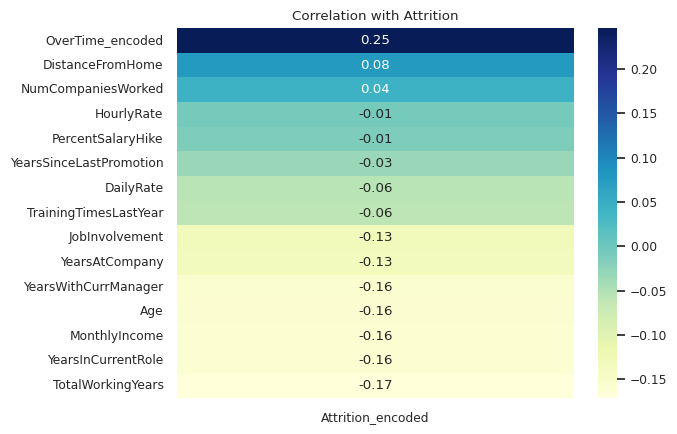

In [35]:
# Correlation Analysis
# Create a heatmap of the correlations with the target column

from sklearn.preprocessing import LabelEncoder

# Encode 'Attrition' and 'OverTime' columns
le = LabelEncoder()
df['Attrition_encoded'] = le.fit_transform(df['Attrition'])
df['OverTime_encoded'] = le.fit_transform(df['OverTime'])

corr = df.corr(numeric_only=True)
target_corr = corr['Attrition_encoded'].drop('Attrition_encoded')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="YlGnBu", annot=True, fmt='.2f')
plt.title('Correlation with Attrition')
plt.show()

**Insight:**  Overtime, DistanceFromHome, and NumCompaniesWorked are strongly correlated with Attrition.

In [36]:
# Monthly Income by Attrition
fig3 = px.box(df, x="Attrition", y="MonthlyIncome", color="Attrition", color_discrete_map={'Yes':'green','No':'darkblue'})
fig3.show()

**Insight:** Employees leaving the company tend to have slightly lower median income of 3202 compared with median income of 5204 for employees who continue working at company.

In [37]:
# Age vs Monthly Income by Attrition
fig4 = px.scatter(df, x='Age', y='MonthlyIncome', color='Attrition',  hover_data=['JobRole'], color_discrete_map={'Yes':'green','No':'darkblue'},
                  title='Age vs Monthly Income by Attrition')
fig4.show()

In [38]:
fig = px.histogram(df,
                   x="TotalWorkingYears",
                   color="Attrition",
                   barmode="stack",   # stacked bars
                   nbins=15,          # number of bins
                   color_discrete_map={'Yes':'green','No':'darkblue'},
                   title="Stacked Histogram of Total Working Years by Attrition")

fig.update_layout(xaxis_title="Total Working Years",
                  yaxis_title="Number of Employees",
                  bargap=0.05)

fig.show()

**Insight:** Attrition is higher among early-career employees. It is more common in employees with less experience (0–10 years) compared to longer-tenured employees.

**Answers to Key Questions:**

1. What is the overall attrition rate in the company?

  Attrition rate is **16.12%** (237 employees left).

2. Which job roles and departments have the highest attrition?

   Job roles like '**Laboratory Technician**', '**Sales Executive**', '**Research Scientist**' and '**Sales Representative**' have high attrition. **Research & Development (R&D)** dept. and **Sales** dept. have high attrition. Roles with more stress, client interaction, or repetitive work are more prone to attrition.

3. Is there a correlation between overtime and attrition?

  Employees doing overtime have a much higher attrition rate compared to those with no overtime. Overtime is a strong factor in employee turnover — likely due to burnout or work-life imbalance.

4. Does job satisfaction or work-life balance influence attrition?

    Yes. Employees who rated 3 in job satisfaction and work-life balance ratings shows higher attrition. Improving job satisfaction and work-life policies can reduce attrition significantly.

5. How do income, education, and experience affect attrition?

  Employees leaving the company tend to have slightly lower median monthly income of 3202 compared with median monthly income of 5204 for employees who continue working at company. Attrition is higher among Bachelor and College level employees. Employees with 0–9 years of experience or short tenure at company are more likely to leave.


**Summary Insight & Recommendation:**

 Attrition is mostly among young, early-career employees, often in Sales/R&D roles, working overtime, with lower satisfaction and income. Training, career growth, and incentive programs may reduce attrition. Improving work-life balance, job satisfaction, and compensation can significantly reduce turnover.

Priscilla Philby Oommen  -- DA02